In [1]:
from matplotlib import pyplot as plt
import pickle
import os
import numpy as np
from typing import Dict, List

In [2]:
path: str = './BarlowB/BarlowB/images/'

def breakdown(path: str, dsName: str) -> Dict[int, List[np.ndarray]]:
    data = {0: [], 1: [], 2: [], 3: []}
    for filename in os.listdir(path):
        if dsName in filename:
            with open(path + filename, 'rb') as p:
                arr = pickle.load(p)
                for i in range(4):
                    data[i].append(arr[:, :, i])
    return data

In [3]:
def plotData(data: Dict[int, List[np.ndarray]], dsName: str) -> None:
    mapping = {0: 'red', 1: 'green', 2: 'blue'}
    fig, axes = plt.subplots(1, 3)
    fig.set_size_inches(15, 5)
    for i in range(3):
        counts, bins = np.histogram(np.stack(data[i]), bins=50)
        axes[i].stairs(counts, bins)
        axes[i].set_title(mapping[i])
    fig.suptitle(dsName)
    plt.show()

In [4]:
dsName: str = 'Chase'
dataChase = breakdown(path, dsName)

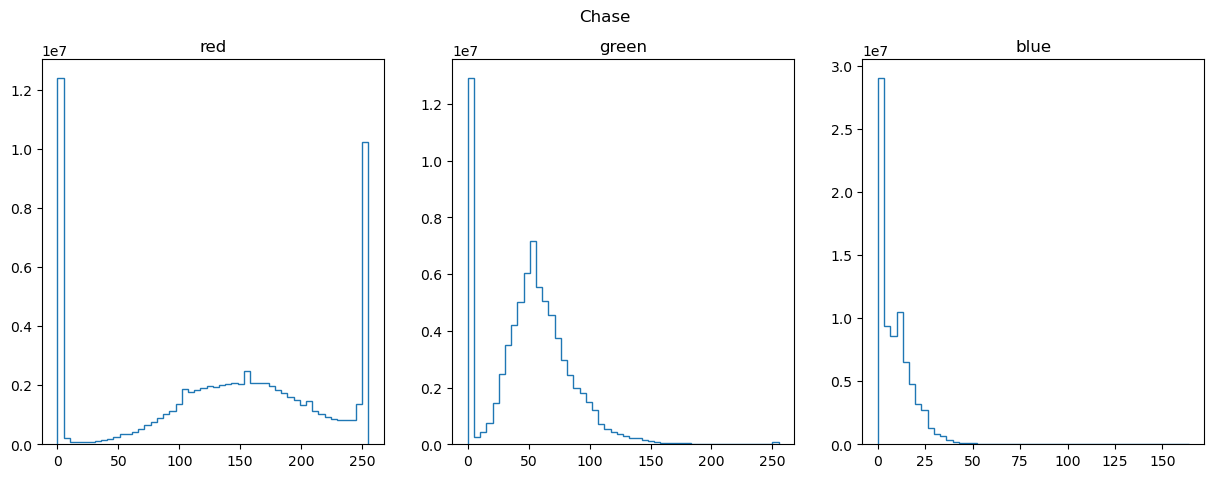

In [5]:
plotData(dataChase, dsName)

In [6]:
dsName: str = 'Drive'
dataDrive = breakdown(path, dsName)

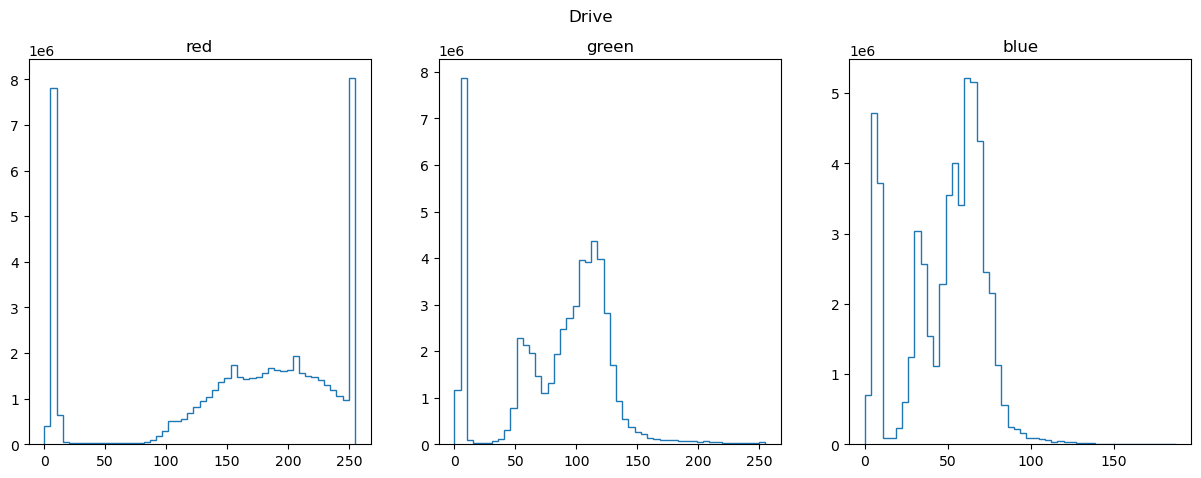

In [7]:
plotData(dataDrive, dsName)

In [8]:
dsName: str = 'Stare'
dataStare = breakdown(path, dsName)

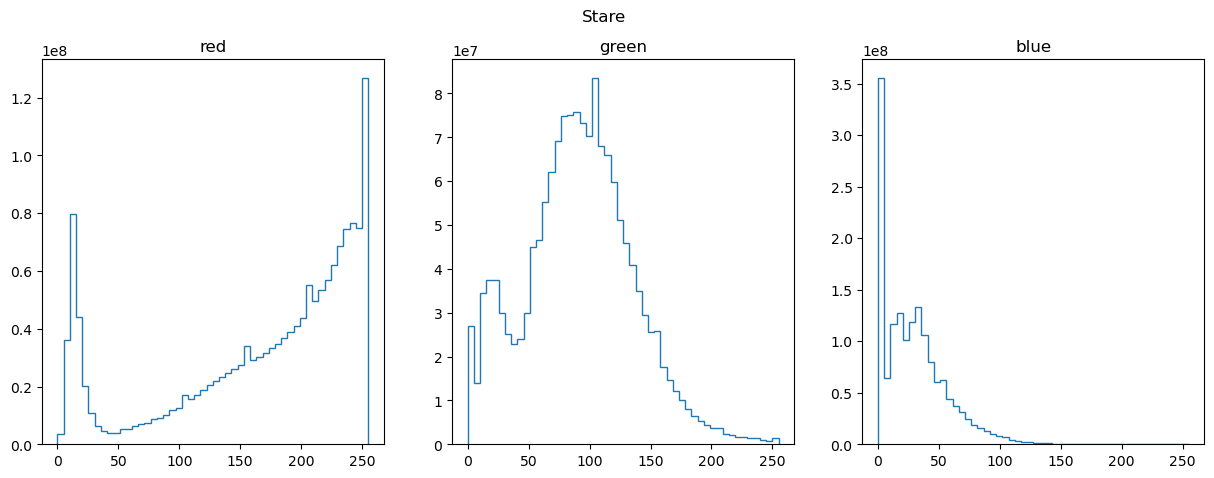

In [9]:
plotData(dataStare, dsName)

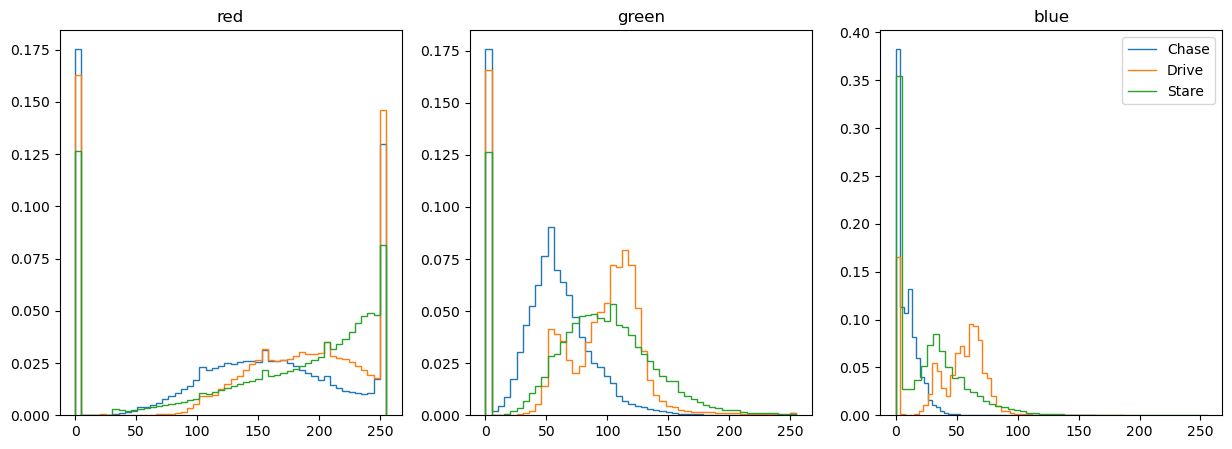

In [29]:
allData = {'Chase': dataChase, 'Drive': dataDrive, 'Stare': dataStare}

mapping = {0: 'red', 1: 'green', 2: 'blue'}
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 5)
for i in range(3):
    for dsName, data in allData.items():
        counts, bins = np.histogram(np.stack(data[i]) * (np.stack(data[3]) // 255), bins=50)
        counts = [x / sum(counts) for x in counts]
        axes[i].stairs(counts, bins, label=dsName)
    axes[i].set_title(mapping[i])
plt.legend()
plt.show()